In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import date, timedelta

In [3]:
df = pd.read_csv('download.csv')
df

,date,desc,category,amount
0,01.06.2021.,food,food,100.00
1,02.06.2021.,medicines,meds,150.00
2,03.06.2021.,bank,bank,150.00
3,04.06.2021.,food,food,20.00
4,05.06.2021.,Emergency medicines,meds,50.00
5,10.06.2021.,bank,bank,100.00
6,10.06.2021.,food1,food,256.45
7,11.06.2021.,bank,bank,179.05
8,12.06.2021.,medicines,meds,500.00
9,14.06.2021.,Coffee and Breakfast,food,160.00


In [4]:
def transform_row(r):
    if len(r.date) == 6:
        r.date += '2021.'
    d = r.date[:-1].split('.')
    r.date = date(*map(int, d[::-1]))
    return r

In [5]:
df = df.apply(transform_row, axis=1)

In [6]:
daily_expenses = []
all_dates = list(pd.date_range(min(df['date']), max(df['date']), freq='D'))
categories = []
for d in list(all_dates):
    value = sum(df[df['date'] == d.date()]['amount'])
    if value:
        categories.append(df[df['date'] == d.date()]['category'].values[-1])
        daily_expenses.append((d.date(), value))
    else:
        all_dates.remove(d)
dates, sums = zip(*daily_expenses)

In [7]:
daily_expenses

[(datetime.date(2021, 6, 1), 100.0),
 (datetime.date(2021, 6, 2), 150.0),
 (datetime.date(2021, 6, 3), 150.0),
 (datetime.date(2021, 6, 4), 20.0),
 (datetime.date(2021, 6, 5), 50.0),
 (datetime.date(2021, 6, 10), 356.45),
 (datetime.date(2021, 6, 11), 179.05),
 (datetime.date(2021, 6, 12), 500.0),
 (datetime.date(2021, 6, 14), 160.0)]

In [8]:
# encoding strings
x = np.array([*zip(range(len(dates)), categories)])
y = sums
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
preprocess = make_column_transformer((OneHotEncoder(), [-1])).fit_transform(x)
x = np.array([*zip(preprocess, x[:, 0])])

In [9]:
x = x[:, 1:]

In [10]:
x

array([['0'],
       ['1'],
       ['2'],
       ['3'],
       ['4'],
       ['5'],
       ['6'],
       ['7'],
       ['8']], dtype=object)

In [11]:
# splitting into test set and training set
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.4)

In [12]:
xtest

array([['7'],
       ['6'],
       ['1'],
       ['8']], dtype=object)

In [13]:
# fitting the regressor to our training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [14]:
# applying the regressor to our test set
ypred = regressor.predict(xtest)

In [15]:
ypred

array([262.47905405, 232.19594595,  80.78040541, 292.76216216])

In [16]:
ytest

[500.0, 179.05, 150.0, 160.0]

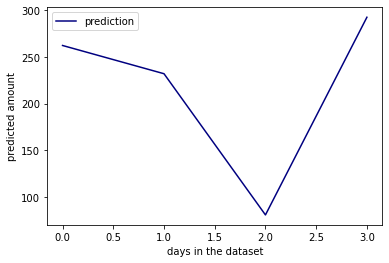

In [17]:
# plt.plot(ytest, color = 'green')
plt.plot(ypred, color = 'navy')
plt.ylabel('predicted amount')
plt.xlabel('days in the dataset')
plt.legend(['prediction'])
plt.show()

In [18]:
ypred1 = regressor.predict([[14]])

In [19]:
ypred1

array([474.46081081])

In [20]:
#plt.plot(ytest, color = 'green')
#plt.plot(ypred1, color = 'navy')
#plt.ylabel('predicted amount')
#plt.xlabel('days in the test set')
#plt.show()

In [21]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.04609708581947969